1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


<class 'numpy.ndarray'>
[ 2  3  5  5 16 22 23 12  8  4] 
 0.5346520727264643
99.99884284357931 51.861251054467054 53.46520727264643
1.9281995865960881 0.5186185117720784 0.5346520727264643
51.861251054467054 51.861251054467054


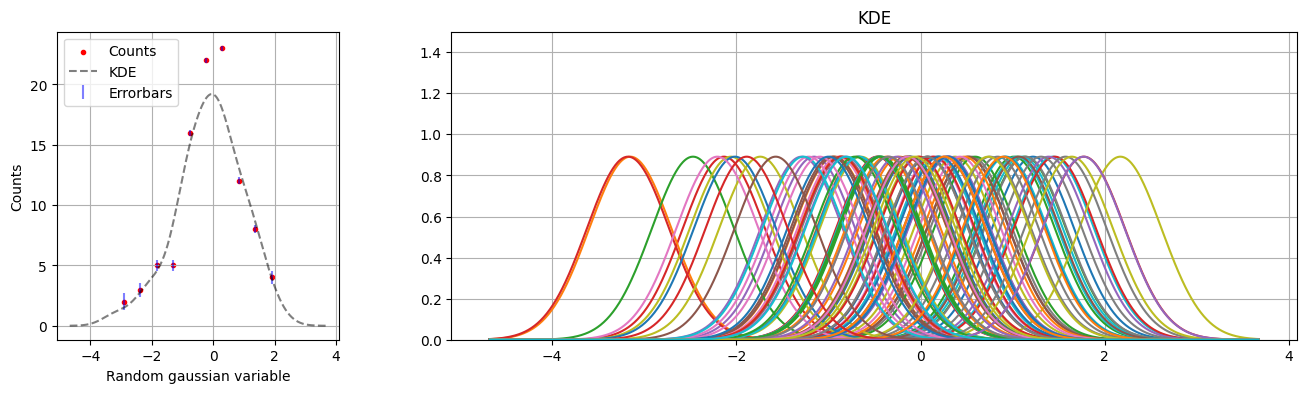

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

N = 100;
x = np.random.normal(0, 1, N)

counts, bin_edges = np.histogram(x, bins=10)
print(type(bin_edges))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), gridspec_kw={'width_ratios': [1, 3]})
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
bin_width = (bin_edges[1] - bin_edges[0])
yerr = 1/np.sqrt(counts)

print(counts, '\n', bin_width)

ax1.errorbar(bin_centers, counts, yerr, fmt = 'none', ecolor= 'b', label = 'Errorbars', alpha  =0.5)
ax1.scatter(bin_centers, counts, marker = '.', color = 'r', label = 'Counts')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Random gaussian variable')
ax1.legend(loc= 'best')
ax1.grid()


w = np.linspace(x.min()-1.5, x.max()+1.5, 1000)
gaussian_sum = np.zeros(len(w))
for i in range(N):
    gauss = sc.stats.norm.pdf(w, loc = x[i], scale =  1.06 * x.std() * x.size**(-1/5))
    ax2.plot(w, gauss)
    gaussian_sum += gauss
ax2.set_ylim(0, 1.5)
ax2.grid()
ax2.set_title('KDE')

total_gauss = np.sum(gaussian_sum)

integral = sc.integrate.trapezoid(counts, bin_centers)
integral1 = sc.integrate.trapezoid(gaussian_sum, w)

print(integral1, integral, N*bin_width)

factor = integral1 / integral
print(factor, 1/factor, bin_width)

ax1.plot(w, gaussian_sum/factor, color = 'k', linestyle = '--', label = 'KDE', alpha = 0.5)
ax1.legend()

print(integral, integral1/factor)


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

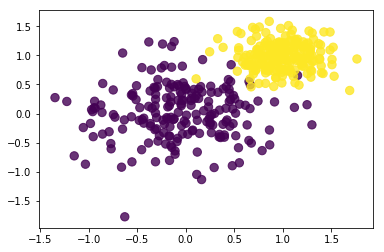

In [197]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

[[0.31497049 0.26899158]
 [0.26899158 0.04545834]]
[[6.81273757e-05 2.00330975e-02]
 [2.00330975e-02 9.83777283e-02]]
[[0.62477752 0.30516471]
 [0.30516471 0.03950242]]
[[0.36958527 0.01120797]
 [0.01120797 0.05263677]]
[[0.68083663 0.37811434]
 [0.37811434 0.74247284]]


C:\Users\nickt\AppData\Local\Temp\ipykernel_22612\1103733290.py:15: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x, y = np.random.multivariate_normal(means, cov, 1000).T


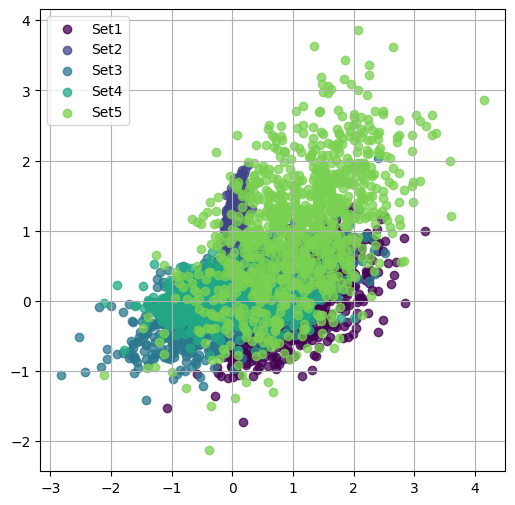

In [ ]:
cmap = plt.get_cmap('viridis')

def fun(N):
    fig, ax = plt.subplots(figsize = (6, 6))
    ax.grid()
    for i in range(N):    
        
        color = cmap(i/N)
        label = f"Set{i+1}"
        
        means = np.random.randint(0, 2, 2)
        A = np.random.rand(2, 2)
        cov = A*A.T
        x, y = np.random.multivariate_normal(means, cov, 1000).T
        
        ax.scatter(x, y, color= color, label = label, alpha = 0.75)
        ax.legend(loc = 'best')
   

fun(5)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

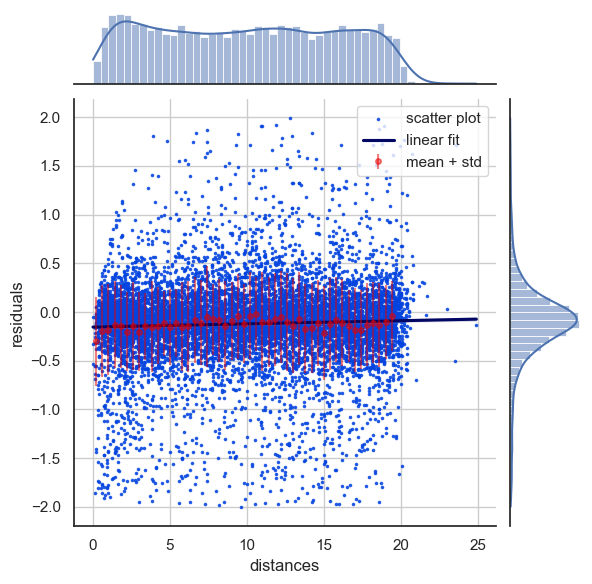

In [344]:
sns.set(style='white')

file = np.load('residuals_261.npy', allow_pickle=True)
data = pd.DataFrame(file.item())

s = data[(data['residuals']<2) & (data['residuals']>-2)]

fit_sc = sc.stats.linregress(s['residuals'], s['distances'])

j = sns.jointplot(y='residuals', x='distances', data = s, kind = 'reg', label ='scatter plot',
                  scatter_kws=dict(color='xkcd:blue', s = 2.5),
                  line_kws = dict(color='xkcd:darkblue', alpha = 1, label = 'linear fit'),
                  marginal_kws=dict(bins = 50))

# defining the bins
N = 50
bin_number = N
bin_width = 20/N

bin_edges = np.array([0 + bin_width * i for i in range(N)])
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

x = bin_centers

# calculating the mean distance in the bins
y = np.array([   s[  (s['distances']>bin_edges[i]) & (s['distances']<bin_edges[i+1]) ]['residuals'].mean()      for i in range(N-1)  ])

# calculating the std
erry = np.array([   s[  (s['distances']>bin_edges[i]) & (s['distances']<bin_edges[i+1]) ]['residuals'].std()      for i in range(N-1)  ])

#plotting
j.ax_joint.errorbar(x, y, erry, color = 'xkcd:red', alpha = 0.5, fmt = 'o', markersize= 4, label = 'mean + std')
j.ax_joint.legend(loc='best')
j.ax_joint.grid()
